In [1]:
import patsy as ps

In [5]:
data = ps.demo_data('x', 'y', 'z', min_rows = 20)
data['y'] = data['x'] + data['z'] + 0.1 * data['y']

In [3]:
import pymc3 as pm

In [6]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x + z', data)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, z, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


In [7]:
import arviz as az

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'x'}>],
       [<AxesSubplot:title={'center':'z'}>,
        <AxesSubplot:title={'center':'z'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

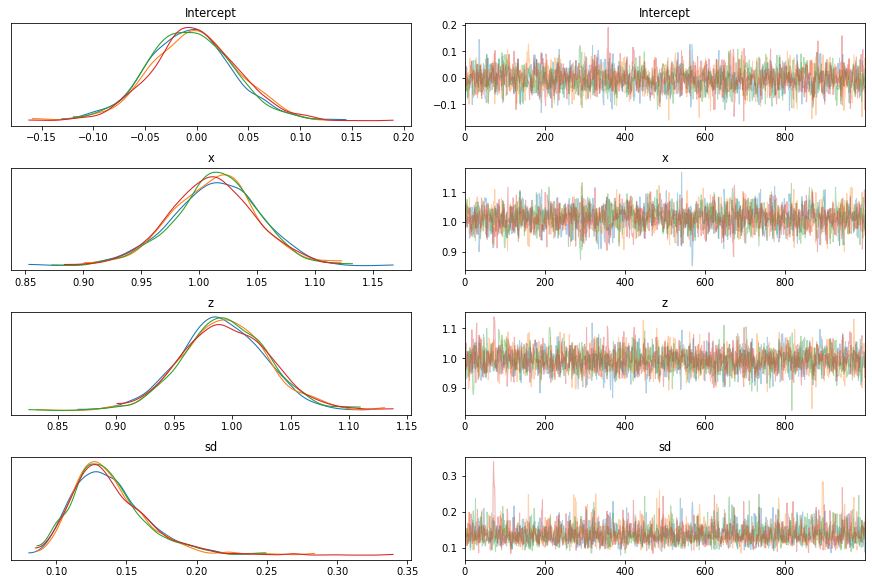

In [8]:
az.plot_trace(trace)

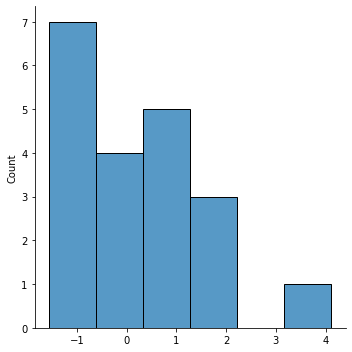

In [13]:
import seaborn as sns
sns.displot(data['y'])